In [210]:
import pandas as pd
import matplotlib.pyplot as plt

Тестовое задание на позицию: Эксперт по медиа исследованиям.
Инструменты: Python (Библиотека pandas и др.)
Тестируемые навыки: Знание методов обработки и анализа медийных данных.

Задание:
1) Импортировать через Python файл Finance_category_tv.csv
2) Добавить колонки: 
- week (Дата) (Дата начала недели)
- month (Дата) (Дата начала месяца)
- year (Число) (Год)

3) Показать ТОП Банков (Именно банков) по статистике: tvr_all_18

4) Составить ChannelMix (Сплит в % по телеканалам) для ТОП 3 банка по статистике tvr_all_18

5) Просчитать аффинитивность для ТОП-3 банка для статистики tvr_w_25 относительно tvr_all_18

6) Посмотреть все уникальные значения в колонке models_list

7) Придумать простую систему классификаций продуктов по колонке models_list. И добавить ее в новую колонку: segmentation

8) Сделать отчет о топ, как каждый банк из ТОП-3 распределяет рейтинги tvr_all_18 по продуктам из segmentation

#### 1. Импортировать через Python файл Finance_category_tv.csv

In [222]:
df = pd.read_csv('Finance_category_tv.csv')
print(f'В таблице содержиться {len(df[df.duplicated(keep=False)])} ({round((len(df[df.duplicated(keep=False)]) / len(df)) * 100, 2)} %) явных дубля. Удалим дубли \n')
df = df.drop_duplicates()
df.info()
df.head()

В таблице содержиться 316 (0.89 %) явных дубля. Удалим дубли 

<class 'pandas.core.frame.DataFrame'>
Index: 35342 entries, 0 to 35511
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   advertisement_id         35342 non-null  int64  
 1   advertisers_list         35342 non-null  object 
 2   brands_list              35342 non-null  object 
 3   models_list              35342 non-null  object 
 4   carrier                  35342 non-null  object 
 5   advertisement_placement  35342 non-null  object 
 6   advertisement_type       35342 non-null  object 
 7   day                      35342 non-null  object 
 8   tvr_all_18               35342 non-null  float64
 9   tvr_w_25                 35342 non-null  float64
 10  tvr_m_25                 35342 non-null  float64
 11  advertisement_duration   35342 non-null  int64  
 12  article_list_4           35342 non-null  object 
 13  article_list_3    

,advertisement_id,advertisers_list,brands_list,models_list,carrier,advertisement_placement,advertisement_type,day,tvr_all_18,tvr_w_25,tvr_m_25,advertisement_duration,article_list_4,article_list_3,article_list_2
0,913492,ВТБ,ВТБ,ВТБ УСЛУГИ БАНКОВ,ЗВЕЗДА,Сетевое,Спонсор,2021-02-19,0.181097,0.075731,0.347464,0,УСЛУГИ БАНКОВ,УСЛУГИ УПРАВЛЕНИЯ ФИНАНСАМИ,УСЛУГИ ФИНАНСОВЫЕ
1,913492,ВТБ,ВТБ,ВТБ УСЛУГИ БАНКОВ,КАРУСЕЛЬ,Сетевое,Спонсор,2021-02-25,0.719209,0.862304,0.476986,0,УСЛУГИ БАНКОВ,УСЛУГИ УПРАВЛЕНИЯ ФИНАНСАМИ,УСЛУГИ ФИНАНСОВЫЕ
2,3219378,СОВКОМБАНК,СОВКОМБАНК,СОВКОМБАНК УСЛУГИ БАНКОВ,СТС,Сетевое,Спонсор,2021-02-21,0.598378,0.778195,0.463786,0,УСЛУГИ БАНКОВ,УСЛУГИ УПРАВЛЕНИЯ ФИНАНСАМИ,УСЛУГИ ФИНАНСОВЫЕ
3,3219378,СОВКОМБАНК,СОВКОМБАНК,СОВКОМБАНК УСЛУГИ БАНКОВ,НТВ,Сетевое,Спонсор,2021-02-21,4.365801,6.258130,2.797780,0,УСЛУГИ БАНКОВ,УСЛУГИ УПРАВЛЕНИЯ ФИНАНСАМИ,УСЛУГИ ФИНАНСОВЫЕ
4,3221086,СОВКОМБАНК,СОВКОМБАНК,СОВКОМБАНК УСЛУГИ БАНКОВ; СОВКОМБАНК ХАЛВА КРЕ...,СТС,Сетевое,Спонсор,2021-02-21,0.598378,0.778195,0.463786,0,КРЕДИТНЫЕ КАРТЫ; УСЛУГИ БАНКОВ,КРЕДИТОВАНИЕ ФИЗИЧЕСКИХ ЛИЦ; УСЛУГИ УПРАВЛЕНИЯ...,УСЛУГИ ФИНАНСОВЫЕ


#### 2. Добавить колонки: 
- week (Дата) (Дата начала недели)
- month (Дата) (Дата начала месяца)
- year (Число) (Год)

In [16]:
df['date'] = pd.to_datetime(df['day'])
df['week'] = df['date'] - pd.to_timedelta(df['date'].dt.weekday, unit='d')
df['month'] = df['date'].values.astype('datetime64[M]')
df['year'] = df['date'].dt.year
df.head()

,advertisement_id,advertisers_list,brands_list,models_list,carrier,advertisement_placement,advertisement_type,day,tvr_all_18,tvr_w_25,tvr_m_25,advertisement_duration,article_list_4,article_list_3,article_list_2,date,week,month,year
0,913492,ВТБ,ВТБ,ВТБ УСЛУГИ БАНКОВ,ЗВЕЗДА,Сетевое,Спонсор,2021-02-19,0.181097,0.075731,0.347464,0,УСЛУГИ БАНКОВ,УСЛУГИ УПРАВЛЕНИЯ ФИНАНСАМИ,УСЛУГИ ФИНАНСОВЫЕ,2021-02-19,2021-02-15,2021-02-01,2021
1,913492,ВТБ,ВТБ,ВТБ УСЛУГИ БАНКОВ,КАРУСЕЛЬ,Сетевое,Спонсор,2021-02-25,0.719209,0.862304,0.476986,0,УСЛУГИ БАНКОВ,УСЛУГИ УПРАВЛЕНИЯ ФИНАНСАМИ,УСЛУГИ ФИНАНСОВЫЕ,2021-02-25,2021-02-22,2021-02-01,2021
2,3219378,СОВКОМБАНК,СОВКОМБАНК,СОВКОМБАНК УСЛУГИ БАНКОВ,СТС,Сетевое,Спонсор,2021-02-21,0.598378,0.778195,0.463786,0,УСЛУГИ БАНКОВ,УСЛУГИ УПРАВЛЕНИЯ ФИНАНСАМИ,УСЛУГИ ФИНАНСОВЫЕ,2021-02-21,2021-02-15,2021-02-01,2021
3,3219378,СОВКОМБАНК,СОВКОМБАНК,СОВКОМБАНК УСЛУГИ БАНКОВ,НТВ,Сетевое,Спонсор,2021-02-21,4.365801,6.258130,2.797780,0,УСЛУГИ БАНКОВ,УСЛУГИ УПРАВЛЕНИЯ ФИНАНСАМИ,УСЛУГИ ФИНАНСОВЫЕ,2021-02-21,2021-02-15,2021-02-01,2021
4,3221086,СОВКОМБАНК,СОВКОМБАНК,СОВКОМБАНК УСЛУГИ БАНКОВ; СОВКОМБАНК ХАЛВА КРЕ...,СТС,Сетевое,Спонсор,2021-02-21,0.598378,0.778195,0.463786,0,КРЕДИТНЫЕ КАРТЫ; УСЛУГИ БАНКОВ,КРЕДИТОВАНИЕ ФИЗИЧЕСКИХ ЛИЦ; УСЛУГИ УПРАВЛЕНИЯ...,УСЛУГИ ФИНАНСОВЫЕ,2021-02-21,2021-02-15,2021-02-01,2021


#### 3. Показать ТОП Банков (Именно банков) по статистике: tvr_all_18

In [225]:
# Найдем список всех рекламодателей которые предоставляют услуги банков
list_banks = list(df.loc[df['article_list_4'].str.contains('услуги банков',case=False)]['advertisers_list'].unique())
# print('Список баноков:')
# for bank in list_banks:
#     print(bank)
# оставим в таблице только те строки, где рекламодатель из списка банков
df_banks = df.loc[df['advertisers_list'].isin(list_banks)]

print('Отфильтровано строк с не банками: {:.2f}%'.format(((len(df) - len(df_banks)) / len(df)) * 100)) 

# Показатель tvr характеризует процент аудитории контактировавшей с рекламой. 
# Здесь важно уточнить рассчитывается ли этот процент от одного и того же количества аудитории или 
# это значение может отличатся.
# Далее буду исходить из предположения что генеральная совокупность у всех каналов равная и значения можно суммировать
# В таблице, колонка sum эта сумма процентов аудитории посмотревшей рекламу
print('Топ банков по сумме tvr_all_18:')
df_banks_top = (df_banks.groupby('advertisers_list', as_index=False)
                         .agg(median=('tvr_all_18', 'median'), 
                              sum=('tvr_all_18', 'sum'))
                         .sort_values(by='sum', 
                                        ascending=False))
df_banks_top

Отфильтровано строк с не банками: 10.59%
Топ банков по сумме tvr_all_18:


,advertisers_list,median,sum
0,RAIFFEISEN,0.320607,4236.027475
10,СОВКОМБАНК,0.533550,4043.545766
9,СБЕР,0.301073,3628.514906
1,TCS GROUP HOLDING,0.108589,2416.430926
2,АЛЬФА-БАНК,0.211598,2403.364847
5,ОТКРЫТИЕ (ФИНАНСОВАЯ КОРПОРАЦИЯ),0.213931,909.251850
4,ГАЗПРОМБАНК,0.234423,612.534079
8,РОСБАНК,0.233039,581.662389
6,ПОЧТА БАНК,0.946456,570.160871
7,РЕНЕССАНС,0.741066,411.244941


#### 4. Составить ChannelMix (Сплит в % по телеканалам) для ТОП 3 банка по статистике tvr_all_18

In [227]:
print('Наибольшие рейтинги у НТВ, Первого канала, Россия 1')
list_top3_banks = list(df_banks_top[:3]['advertisers_list'])
df_top_3_banks = df_banks.loc[df_banks['advertisers_list'].isin(list_top3_banks)]
df_top_3_banks_pivot = (df_top_3_banks.pivot_table(index='carrier', 
                                                   columns='advertisers_list', 
                                                   values='tvr_all_18', 
                                                   aggfunc='sum').fillna(0))
df_top_3_banks_pivot['%_RAIFFEISEN'] = df_top_3_banks_pivot['RAIFFEISEN'] / df_top_3_banks_pivot['RAIFFEISEN'].sum()
df_top_3_banks_pivot['%_СБЕР'] = df_top_3_banks_pivot['СБЕР'] / df_top_3_banks_pivot['СБЕР'].sum()
df_top_3_banks_pivot['%_СОВКОМБАНК'] = df_top_3_banks_pivot['СОВКОМБАНК'] / df_top_3_banks_pivot['СОВКОМБАНК'].sum()
df_top_3_banks_pivot[['%_RAIFFEISEN', '%_СБЕР', '%_СОВКОМБАНК']].style.format({'%_RAIFFEISEN':'{:.2%}',
                                                                               '%_СБЕР':'{:.2%}',
                                                                               '%_СОВКОМБАНК':'{:.2%}'}).background_gradient()


Наибольшие рейтинги у НТВ, Первого канала, Россия 1


advertisers_list,%_RAIFFEISEN,%_СБЕР,%_СОВКОМБАНК
carrier,,,
ДОМ КИНО,2.02%,0.15%,0.00%
ДОМАШНИЙ,0.00%,1.53%,0.00%
ЗВЕЗДА,4.63%,2.41%,3.98%
КАРУСЕЛЬ,0.00%,0.41%,0.00%
МАТЧ ТВ,2.20%,2.37%,0.00%
МИР,2.36%,0.00%,3.76%
МУЗ ТВ,0.45%,0.00%,0.00%
НТВ,16.93%,9.66%,11.03%
ПЕРВЫЙ КАНАЛ,16.28%,11.34%,16.22%


#### 5. Просчитать аффинитивность для ТОП-3 банка для статистики tvr_w_25 относительно tvr_all_18

In [229]:
print('Рейтинг tvr_w_25 показывает высокую аффинитивность относительно tvr_all_18:')
df_top_3_banks_gr = df_top_3_banks.groupby('advertisers_list')[['tvr_all_18', 'tvr_w_25']].sum()
df_top_3_banks_gr['affinity'] = df_top_3_banks_gr['tvr_w_25'] / df_top_3_banks_gr['tvr_all_18']
df_top_3_banks_gr[['affinity']].style.format({'affinity':'{:.0%}'})

Рейтинг tvr_w_25 показывает высокую аффинитивность относительно tvr_all_18:


,affinity
advertisers_list,
RAIFFEISEN,112%
СБЕР,114%
СОВКОМБАНК,114%


#### 6. Посмотреть все уникальные значения в колонке models_list

In [128]:
set(df['models_list'].apply(lambda x: x.split(';')).drop_duplicates().explode().apply(lambda x: x.strip()))

{'MASTERCARD PLATINUM ТИНЬКОФФ БАНК КРЕДИТНАЯ КАРТА',
 'MASTERCARD WORLD PLATINUM ТИНЬКОФФ БАНК КРЕДИТНАЯ КАРТА',
 'MASTERCARD WORLD ТИНЬКОФФ БАНК BLACK БАНКОВСКАЯ КАРТА',
 'MASTERCARD АЛЬФА-БАНК 100 ДНЕЙ БЕЗ ПРОЦЕНТОВ КРЕДИТНАЯ КАРТА',
 'MASTERCARD МЕЖДУНАРОДНАЯ ПЛАТЕЖНАЯ СИСТЕМА',
 'MASTERCARD СБЕР БАНК TRAVEL БАНКОВСКАЯ КАРТА',
 'OZON КОСВЕННАЯ РЕКЛАМА',
 'RAIFFEISENBANK БАНКОВСКАЯ КАРТА',
 'RAIFFEISENBANK РАСЧЕТНЫЙ СЧЕТ ДЛЯ БИЗНЕСА',
 'RAIFFEISENBANK УСЛУГИ БАНКОВ',
 'VISA АЛЬФА-БАНК 100 ДНЕЙ БЕЗ ПРОЦЕНТОВ КРЕДИТНАЯ КАРТА',
 'VISA ОТКРЫТИЕ 120 ДНЕЙ КРЕДИТНАЯ КАРТА',
 'АЛЬФА-БАНК 100 ДНЕЙ БЕЗ ПРОЦЕНТОВ КРЕДИТНАЯ КАРТА',
 'АЛЬФА-БАНК ИПОТЕЧНОЕ КРЕДИТОВАНИЕ',
 'АЛЬФА-БАНК УСЛУГИ БАНКОВ',
 'БКС МИР ИНВЕСТИЦИЙ МОБИЛЬНОЕ ПРИЛОЖЕНИЕ',
 'БРОКЕРКРЕДИТСЕРВИС УСЛУГИ ИНВЕСТИЦИОННЫХ КОМПАНИЙ',
 'БРОКЕРКРЕДИТСЕРВИС УСЛУГИ ФИНАНСОВЫЕ',
 'ВТБ УСЛУГИ БАНКОВ',
 'ГАЗПРОМБАНК ВАШ УСПЕХ ВКЛАД',
 'ГАЗПРОМБАНК ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ',
 'ГАЗПРОМБАНК УСЛУГИ БАНКОВ',
 'ДЕНЕЖНЫЕ ПЕРЕВОДЫ МОБИЛЬНОЕ ПРИЛ

#### 7. Придумать простую систему классификаций продуктов по колонке models_list. И добавить ее в новую колонку: segmentation

In [230]:
#df['models_list'].unique()

# Сделаем словарь с категориями. В последних версиях питона, словарь гарантирует порядок ключей, 
# поэтому расположим категории в порядке увеличения приоритетности. Так как некоторые строки 
# попадают сразу внесколько категорий, останеться наиболее приоритетная категория
dict_category = {
    'Услуги банков': ['услуги банков', 'кредитование'],
    'Мобильное приложение': ['мобильное приложение'],
    'Инвестиции': ['инвестиционных', 'инвестиции'],
    'Карта': ['банковская карта', 'кредитная карта'],
    'Услуги пенсионных фондов':['пенсионный фонд', 'пенсионных фондов'],
    'Агрегатор':['агрегатор'],
    'Услуги для бизнеса':['услуги для бизнеса', 'услуг для бизнеса'],
    'Кредит':['кредитование'],
    'Вклад':['вклад']
}
for category, list_values in dict_category.items():
    for value in list_values:
        df.loc[df['models_list'].str.contains(value.upper()), 'category'] = category
df['category'].value_counts()

category
Карта                       11963
Кредит                       5836
Инвестиции                   4974
Услуги банков                4165
Агрегатор                    4120
Услуги для бизнеса           3072
Вклад                         424
Мобильное приложение          405
Услуги пенсионных фондов      383
Name: count, dtype: int64

#### 8. Сделать отчет о топ, как каждый банк из ТОП-3 распределяет рейтинги tvr_all_18 по продуктам из segmentation

advertisers_list,%_RAIFFEISEN,%_СБЕР,%_СОВКОМБАНК
category,,,
Агрегатор,0.00%,42.62%,0.00%
Вклад,0.00%,0.00%,8.10%
Карта,35.36%,0.06%,43.86%
Кредит,0.00%,0.00%,45.61%
Мобильное приложение,0.00%,0.23%,0.00%
Услуги банков,64.64%,0.43%,2.43%
Услуги для бизнеса,0.00%,56.67%,0.00%


<Figure size 1200x800 with 0 Axes>

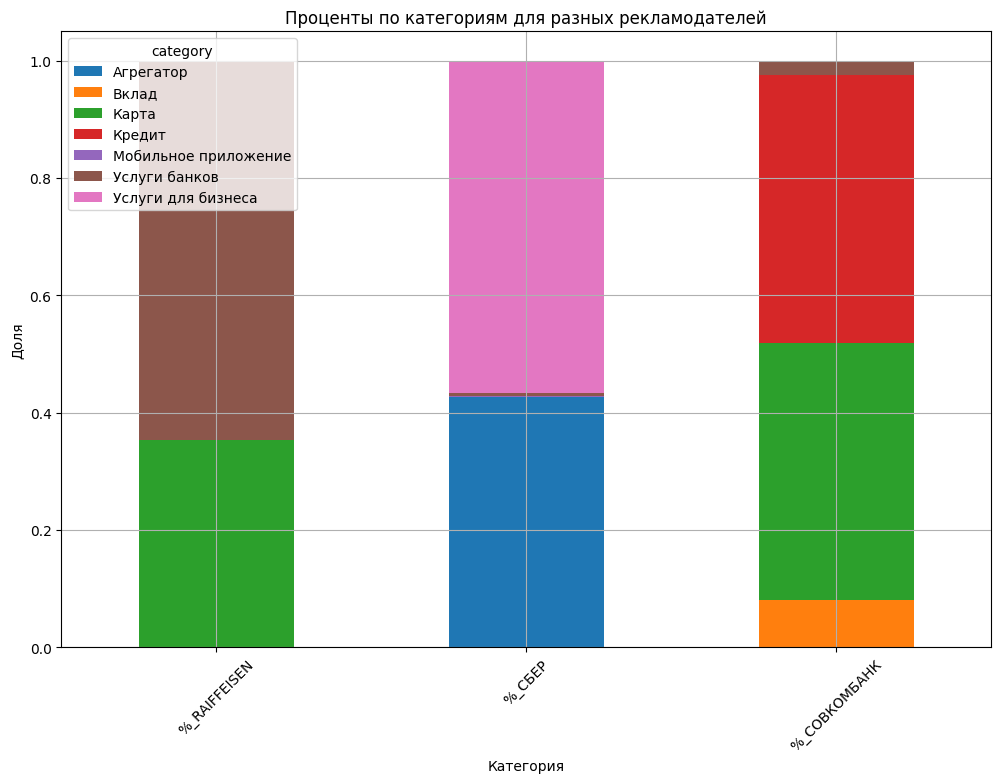

In [209]:
df_top_3_banks = df.loc[df['advertisers_list'].isin(list_top3_banks)]
df_tvr_distr = df_top_3_banks.pivot_table(index='category', columns='advertisers_list', values='tvr_all_18', aggfunc='sum')
df_tvr_distr['%_RAIFFEISEN'] = df_tvr_distr['RAIFFEISEN'] / df_tvr_distr['RAIFFEISEN'].sum()
df_tvr_distr['%_СБЕР'] = df_tvr_distr['СБЕР'] / df_tvr_distr['СБЕР'].sum()
df_tvr_distr['%_СОВКОМБАНК'] = df_tvr_distr['СОВКОМБАНК'] / df_tvr_distr['СОВКОМБАНК'].sum()
df_tvr_distr = df_tvr_distr[['%_RAIFFEISEN', '%_СБЕР', '%_СОВКОМБАНК']]

plt.figure(figsize=(12, 8))
df_tvr_distr.T.plot(kind='bar', stacked=True,figsize=(12, 8), grid=True)
plt.xticks(rotation=45)
plt.xlabel('Категория')
plt.ylabel('Доля')
plt.title('Проценты по категориям для разных рекламодателей')
df_tvr_distr.fillna(0).style.format({'%_RAIFFEISEN':'{:.2%}','%_СБЕР':'{:.2%}','%_СОВКОМБАНК':'{:.2%}'}).background_gradient()

У Совкомбанка большая часть рейтинга сосредоточена на категориях "Карта" и "Кредит"  
Сбер - "Агрегаторы" и "Услуги для бизнеса"  
RAIFFEISEN - "Карты" и "Услуги банков"  